In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [35]:
iris = datasets.load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


## Задание 1

In [4]:
#Корреляции для всего df
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [5]:
#Корреляции для класса 0 
df[df['species']=='setosa'][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


In [6]:
#Корреляции для класса 1
df[df['species']=='versicolor'][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


In [7]:
#Корреляции для класса 2
df[df['species']=='virginica'][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


### Вывод: 
На всей выборке появляются отрицательные корреляции. Для класса 0 'setosa' высокая корреляция только у признаков 'sepal length (cm)' и 'sepal width (cm)', для классов 1 и 2 — для признаков 'sepal length (cm)' и 'petal length (cm)'.

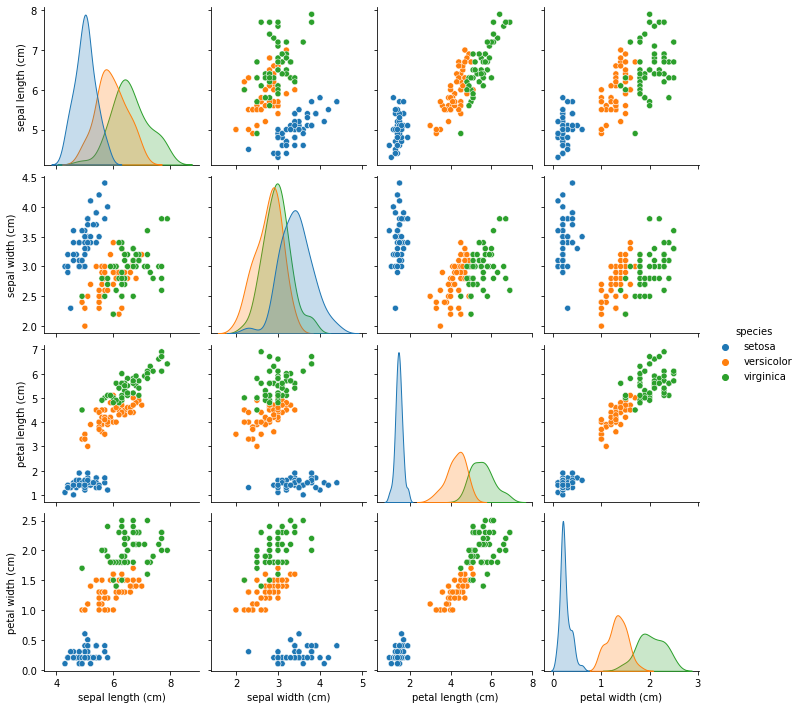

In [16]:
sns.pairplot(df.drop(['target'], axis=1), hue ='species')
plt.show()

### Вывод:
Класс 'setosa' отделим от остальных двух. Для примера, можно взять пару признаков 'petal length (cm)' и 'petal width (cm)'. Чётко разделить классы 'versicolor' и 'virginica' не получится, но можно построить (линейную, квадратичную) поверхность, классифицирующую признаки с высокой точностью. Для этого пригодны почти все пары признаков, кроме 'sepal length (cm)' и 'sepal width (cm)'.

## Задание 2

In [32]:
#Для пары признаков  'petal length (cm)' и 'petal width (cm)'
df_new = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])

In [49]:
X = datasets.load_iris().data[:, 2:4]

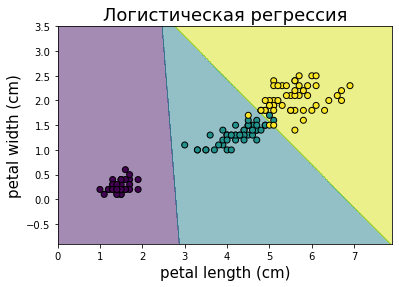

Accuracy =  0.9666666666666667
Balanced accuracy =  0.9666666666666667


In [36]:
clf = LogisticRegression().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.title('Логистическая регрессия', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

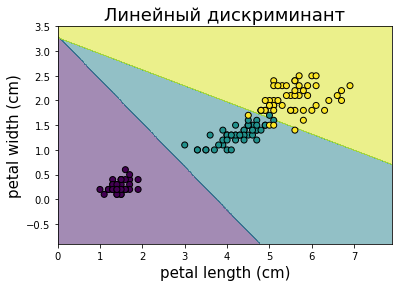

Accuracy =  0.96
Balanced accuracy =  0.96


In [37]:
clf = LinearDiscriminantAnalysis(solver='lsqr').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.title('Линейный дискриминант', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

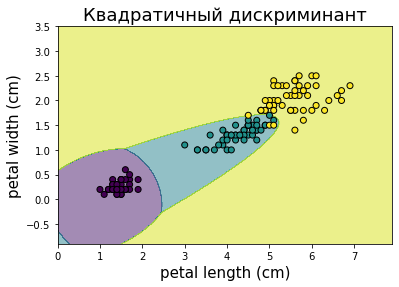

Accuracy =  0.98
Balanced accuracy =  0.98


In [38]:
clf = QuadraticDiscriminantAnalysis().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.title('Квадратичный дискриминант', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

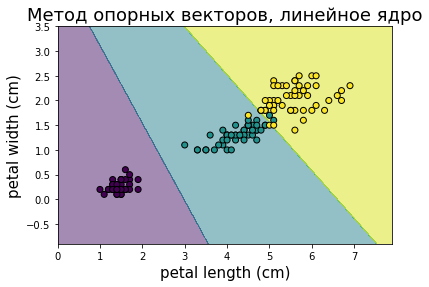

Accuracy =  0.9666666666666667
Balanced accuracy =  0.9666666666666667


In [39]:
clf = SVC(kernel='linear').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.title('Метод опорных векторов, линейное ядро', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

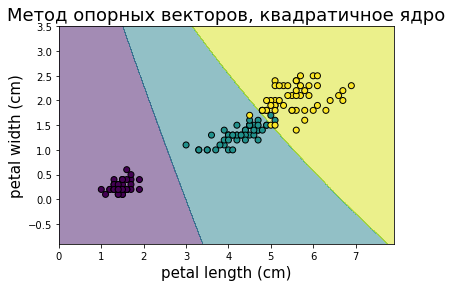

Accuracy =  0.9666666666666667
Balanced accuracy =  0.9666666666666667


In [40]:
clf = SVC(kernel='poly', degree=2).fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.title('Метод опорных векторов, квадратичное ядро', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

### Вывод
Все модели делают хорошее предсказание >95%, которое заметно превосходит простое угадывание с точностью 50%. Худший результат 96% даёт линейный дискриминант. Точность линейной регрессии и метода опорных векторов одинакова, причём точность последнего не зависит от выбора ядра. Наиболее точное предсказание (улучшающее результат линейной регрессии) делает метод опорных векторов. Зато выбор квадратичной классифицирующей поверхности значительно влияет на точность байесовоского классификатора, и лучший результат (98%) даёт квадратичный дискриминант.
Как и предполагалось, 0 класс 'setosa' отделяется от классов 1 и 2, а классы 1 и 2 нельзя полностью разделить "простой" классифицирующей поверхностью. Видно, что в сравнении с двумя признаками из подсказочного ноутбука, признаки 'petal length (cm)', 'petal width (cm)' дают более точное предсказание, и это можно предположить по распределениям классов из задания 1.

## Задание 3

In [161]:
train = df.loc[df['species'] != 'setosa'].reset_index(drop=True)

In [165]:
X = train.iloc[:, 0:4].to_numpy()
y=train.iloc[:, 4].to_numpy()
LDA = LinearDiscriminantAnalysis().fit(X, y)


In [166]:
train['prediction'] = LDA.predict(X)
train['virginica_FP'] = ((train['prediction']==1)&(train['species']=='virginica'))
train['versicolor_FP'] = ((train['prediction']==2)&(train['species']=='versicolor'))

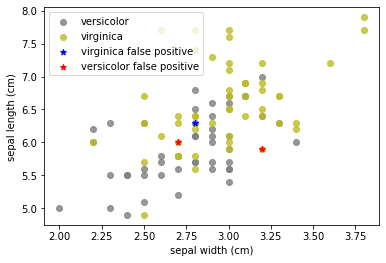

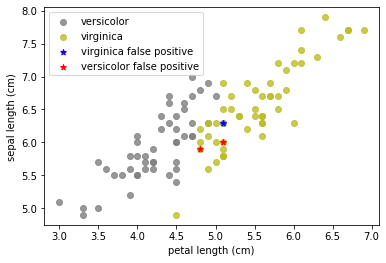

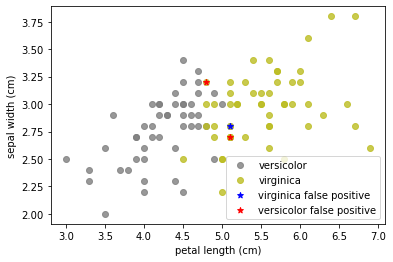

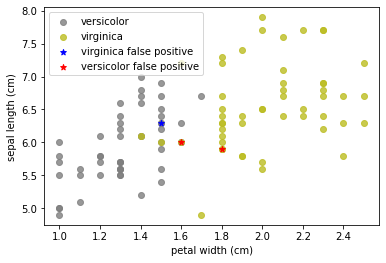

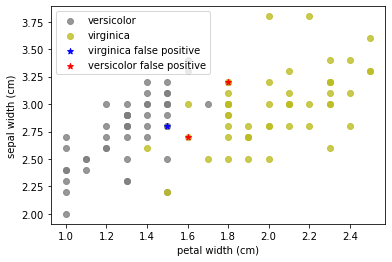

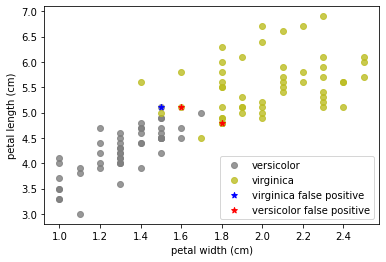

In [164]:
target_names = ['versicolor', 'virginica']

#create LDA plot
plt.figure()
colors = ['red',  'blue']

for i in range(4):
    for j in range(i):
        plt.scatter (train[train['prediction']==1].iloc[:, i],train[train['prediction']==1].iloc[:, j],  alpha=.8, 
                 color='#7f7f7f', label='versicolor')
        plt.scatter (train[train['prediction']==2].iloc[:, i],train[train['prediction']==2].iloc[:, j],  alpha=.8, 
                 color='#bcbd22',label='virginica')
        plt.scatter (train[train['virginica_FP']==True].iloc[:, i],train[train['virginica_FP']==True].iloc[:, j],   
                 color='blue', label='virginica false positive', marker = '*')
        plt.scatter (train[train['versicolor_FP']==True].iloc[:, i],train[train['versicolor_FP']==True].iloc[:, j],   
                 color='red', label='versicolor false positive', marker = '*')
        #add legend to plot
        plt.legend(loc='best', shadow= False , scatterpoints=1)
        plt.xlabel(train.columns[i])
        plt.ylabel(train.columns[j])
        
        #display LDA plot
        plt.show()


### Вывод
Видим, что классы-таки не разделимы, но LDA ошибается всего в трёх случаях из ста, то есть его accuracy = 0.97.
Ещё интересно, что некоторые пары признаков образуют столбики, но я не знаю, что это значит. 
И ещё, наверное, можно сказать, что проекции из четырёхмерного пространства признаков на двухмерные подпространства не дают такой же разделимости, значит, ни от одного нельзя избавиться... (?) Но по всем парам, кроме пары  sepal length/sepal width,   можно построить достаточно хорошую двумерную разделяющую поверхность, что частично видно в корреляциях по классам.

## Задание 4

In [ ]:
def Q_1(x, Sigma, mu):
    return np.dot( np.dot( np.linalg.inv(Sigma).transpose(), x - mu ),  x - mu )
                 

def Q_2(x, Lamda, nu):
    return np.dot( np.dot( np.linalg.inv(Lamda).transpose(), x - nu ),  x - nu )


def l_0(x, df, y):  
    mu = np.zeros(2)
    nu = np.zeros(2)
    for i in range(1, 3):
        mu[i-1] = df[df['target'] == i].iloc[:,0].sum()/df[df.iloc[:,2] == i].shape[0]
        nu[i-1] = df[df['target'] == i].iloc[:,1].sum()/df[df.iloc[:,2] == i].shape[0] 
    Sigma = np.cov(np.array([df_new['petal length (cm)'],df_new['petal width (cm)']]), bias = True)
    return (0.5 * (Q_2(x, df_X_1, nu) - Q_1(x, df_X_2, mu)) + 0.5 * ln(np.linalg.det(df_X_1)) 
                - 0.5 * ln(np.linalg.det(df_X_2)) + ln(P1) - ln(P2))

    
def plot_decision_curve_comparison(X, y, h = 0.01):
    ...

In [185]:
df_new = df.loc[df['species'] != 'setosa'].reset_index(drop=True).drop(columns=['sepal length (cm)', 'sepal width (cm)', 'species'])

In [198]:
p = df_new['target'].value_counts()/df_new['target'].count()

In [200]:
df_new['target'].value_counts()/df_new['target'].count()

0.5

In [206]:
mu = np.zeros(2)
nu = np.zeros(2)
for i in range(1, 3):
    mu[i-1] = df_new[df_new['target'] == i]['petal length (cm)'].sum()/df_new[df_new['target'] == i].shape[0]
    nu[i-1] = df_new[df_new['target'] == i]['petal width (cm)'].sum()/df_new[df_new['target'] == i].shape[0]

In [207]:
df_new[df_new['target'] == 1]['petal length (cm)'].sum()/df_new[df_new['target'] == 1].shape[0]

4.26

In [226]:
df_new[df_new['target'] == i].iloc[:,2]

50    2
51    2
52    2
53    2
54    2
55    2
56    2
57    2
58    2
59    2
60    2
61    2
62    2
63    2
64    2
65    2
66    2
67    2
68    2
69    2
70    2
71    2
72    2
73    2
74    2
75    2
76    2
77    2
78    2
79    2
80    2
81    2
82    2
83    2
84    2
85    2
86    2
87    2
88    2
89    2
90    2
91    2
92    2
93    2
94    2
95    2
96    2
97    2
98    2
99    2
Name: target, dtype: int32

In [228]:
df_new[df_new.iloc[:,2] == 1]

,petal length (cm),petal width (cm),target
0,4.7,1.4,1
1,4.5,1.5,1
2,4.9,1.5,1
3,4.0,1.3,1
4,4.6,1.5,1
5,4.5,1.3,1
6,4.7,1.6,1
7,3.3,1.0,1
8,4.6,1.3,1
9,3.9,1.4,1


In [212]:
[mu[0]]*df_new['target'].shape[0]

[4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26,
 4.26]

In [213]:
df_new['petal length (cm)']-[mu[0]]*df_new['target'].shape[0]
df_new['petal width (cm)']-[mu[0]]*df_new['target'].shape[0]

0     0.44
1     0.24
2     0.64
3    -0.26
4     0.34
      ... 
95    0.94
96    0.74
97    0.94
98    1.14
99    0.84
Name: petal length (cm), Length: 100, dtype: float64

In [221]:
np.cov(arr, bias = True)

array([[0.674764, 0.285844],
       [0.285844, 0.178624]])

In [220]:
arr = np.array([df_new['petal length (cm)'],df_new['petal width (cm)']])